#TIME SERIES ANALYSIS

#Goal: Find outliers, trends and periodicity in the MTA turnstile data
    

##DATA:
MTA subway fares. It is a complete dataset of
rides logged by card swipes for 600 Manhattan stations.

The data was organized  by Sina Kashuk at CUSP. You can get it in the github repo as well as here: http://cosmo.nyu.edu/~fb55/UI_CUSP_2015/data/MTA_Fare.npy. 

It contains 23 different subway card types 
(e.g. monthly pass, daily pass, Act for Disability pass…) as follows:


In [1]:
import numpy as np
import pylab as pl
import pandas as pd
import os
import sys
import matplotlib.pyplot as plt
%pylab inline 
import datetime
#import statsmodels.tsa as sm
import statsmodels.tsa.stattools as sm

Populating the interactive namespace from numpy and matplotlib


In [2]:
from IPython.display import Image
Image( "Ridetypes.png")


Each time series (per station, per ticket type) contains
the number of swipes per week for 194 weeks 
from 05/21/2010 to 02/21/2014. 

The data are available to you as a python data cube here:

you can load it as 

np.load(“MTA_Fare.npy") and 


you will end up with a python numpy array of 
shape (600,23,194)

##note that the missing values are inputted as -1

if you want to do things like algebra (summing time series for example) you need to take care of that! if you replace the -1 entries with NaN remember to use functions that can deal with nans:
np.nanmean
np.nansum...

#Task 1: 
##Event detection: Identify the most prominent event. There is a very significant drop (>3-sigma) in all time series.
##Identify it and figure out what it is due to.


#Task 2: 
##Some of the time series are stationary, some have a complex structure, some show a downward trend: Identify the **ridership types**  that have steadily increased in popularity,  and that have steadily decreased. by how much? (e.g what is the ratio of usage in the first 10 and last 10 weeks)


#Task 3:
##Several stations show a prominent annual periodicity. Identify the 4 **stations** (indentify them by the index of their location in the data cube) that show the most prominent periodic trend on an annual period (52 weeks). (Can you figure out what the periodic peak in rides is due to?)


#EXTRA CREDIT: Cluster. 
##Cluster the time series, i.e. identify groups of time series that look similar among each other. You can use KMeans for example to identify common trends, or PCA (Principle Component Analysis). 
##Since this is extra credit I will leave it to you to figure out the details, but for KMeans for e.g. if you use the sklearn.cluster package it would look something like:

##i am flattening the first 2 dimensions of the cube to cluster all light curves for all stations and all types

tots = data.transpose(2,0,1).reshape(data.shape[2], data.shape[1]*data.shape[0]).T

##removing empty light curves
tots = tots[tots.std(1)>0]

##with Kmeans you have to choose the number of clusters ahead km = 

KMeans(n_clusters=10)

##and standardize the lightcurves before clustering
vals = ((tots.T - tots.mean(1))/tots.std(1)).T

##then you can run:

km.fit(vals)

#HINTS: 

##When I ask you "which station ...", you can sum or average over the ridership types for all station and reduce your data by a factor 23. When I ask you "which rideship type ..." you can sum or average over the stations and reduce your data by a factor 600! (or even better you could take a weighted average)


#Possibly useful functions

##I used a variety of functions, most of them you are familiar with already. here are a few that you may not have encountered yet which I used. 
##(But you do not have to use them! there are many ways to do things and you do not have to solve this problem like I did)

* the numpy function np.where() returns the index where a condition is true. it is slow and inefficient but very intuitive and convenient


* the nupy functions np.nansum(), np.sum(), np.nanmean() etc take an array and the axis along which to sum as inputs. If you want to sum over stations, or over rides, you can use these passing the appropriate axis number: axis=1 axis=2...


* to find periodicity you can use fourier transforms. if you choose to use the numpy package you may want to use the real fft function:  np.fft.rfft  
     
     np.fft.rfft(mydata) 
     
     will return the fourier transform, but what you want is its absolute value: np.abs(). Then to get the x axis of your plot in frequency (1/week since the data is in weeks) you can use the function 

     np.fft.rfftfreq(N, d) 
     
     which takes as arguments N = the length of your time series (the number of datapoints) and d: the Sample spacing, or 1.0/sampling_rate (in this case, with 1/week sampling, if you want the freq in units of week that is just 1)


*  the np.array.flatten() and np.array.reshape() allow you to manipulate the shape of an array, for example if you want to run analysis on each individual time series, each station and each ridership type, which i recommand if you want to work on clustering for extra credit (resulting into 600*23=13800 time series)



In [4]:
#after reading the datacube you should see:

mta = np.load('MTA_Fare.npy')  ## to read the numpy file 
mta.shape


ride types list

In [4]:
ridetype = np.array(['10t', '14d', '1d', '2t', '30d', '7d', 'ada', 'afas', 'exp','ez',
            'ff','mc','mr','month','rfm','rr','sen','spec','tcmc','t',
            'umlim','xbus','stud'])

In [6]:
#after I create a date range (for example with pd.date_range())
#in a log plot to enhance the visibility along the y axis (np.log10(weightedrides[i]))
#all time series, each station each ride type, look like this (pretty ugly)
mta_1=pd.DataFrame.from_records(mta)

In [5]:
mta_ridetype_sum = np.nansum(mta, axis=0)
# mta.shape

In [6]:
mta = np.load('MTA_Fare.npy')  ## to read the numpy file 
mta.shape


(600, 23, 194)

In [7]:
mta_station_sum = np.nansum(mta, axis=1) ##summing by the statin

## Task 1 : To identify the event .

In [8]:
mta_ride=pd.DataFrame(mta_ridetype_sum)

In [9]:
mta_ride1= mta_ride.transpose()  ## taking transpose

In [10]:
mta_ride1.columns=ridetype   ##to name the columns

In [36]:
mta_ride1.head(5)

,10t,14d,1d,2t,30d,7d,ada,afas,exp,ez,...,month,rfm,rr,sen,spec,tcmc,t,umlim,xbus,stud
0,11494477,530386,47663,186413,46670,3697305,8551799,9925,333059,511894,...,122996,789972,59671,28083,-138,124555,20922,5990,220,-600
1,12526720,583394,51347,199090,64214,3981669,9486255,11708,282616,577884,...,151809,907929,69070,32194,-139,121574,21531,5981,335,-600
2,12766490,586057,51499,199531,56857,4032893,9476401,12140,301891,615400,...,151401,913987,69437,32481,-137,122044,21296,6353,328,-600
3,12653538,562465,51926,196252,37292,4032616,9449944,11084,305376,606133,...,146957,902412,67962,32267,-137,121914,21493,6453,347,-600
4,12809558,548722,51017,194747,35074,3925310,9293866,10379,335644,563310,...,137752,855437,66241,31797,40,119640,20161,6177,316,-600


In [11]:
mta_ride1.index=(pd.date_range(pd.to_datetime('5/21/2010'),pd.to_datetime('02/07/2014'),freq='W'))##frequency weekly

#mta_ride2.index=(pd.date_range(pd.to_datetime('5/21/2010'),pd.to_datetime('02/07/2014'),freq='W'))#start = pd.datetime(2010, 5, 21)
#end = pd.datetime(2014, 2, 7)k
#mta3.index = pd.date_range(start, end,freq ='W')

type(mta_ride1)

pandas.core.frame.DataFrame

In [41]:
mta_ride_avg = mta_ride1.mean(axis=1)  ## averaging all the datasets vertically

AttributeError: 'FigureCanvasAgg' object has no attribute 'invalidate'

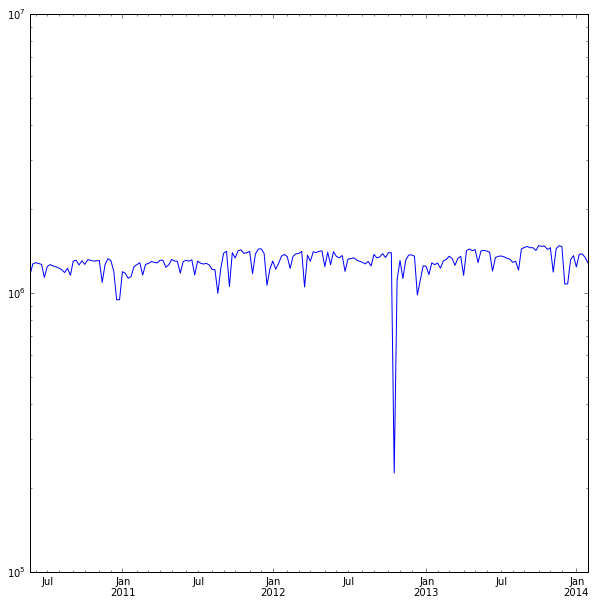

In [42]:

mta_ride_avg.plot(logy=True,legend=True,figsize=(10,10))  ## summing all the ride type and then plooting 

## Observation : As is evident from the average of all the ridertype for all the dates , the greatest event detected is at 25 oct 2012 which is the Hurricane Sandy, the superstorm category 3 hurricane. 


In [ ]:
#as described in the instruction for some of the analysis 
#one can sum time series for all stations
print (mta.shape)
mta_allsum = np.nansum(mta, axis=0)
print (mta_allsum.shape)
#or for all ride types
mta_allsum = np.nansum(mta, axis=1)
print (mta_allsum.shape)



##NOTE ON THE TREND DETECTION:
###you should find the ride type that has the steepest increase, and the steepest decrease. notice: we are looking for something that has a more or less constant trend

###to do this you can sum or average (a weighted average is probably best) over all stations, leaving you with 23 time series, one per ridership type. 

###you can use a rolling mean for smoothing (pd.rolling_mean() for example), and you can calculate the ratio of the flux near the beginning to the flux near the end of the time series.

###notice that you should inspect the time series, either algorithmically or by eye, to ensure you see a trend, and not just changing structure.


###below is an example of a lightcurve with structure (top) and a lightcurve with a constant trend (bottom) both showing a large deviation between the beginning and the end of the time series

## Task 2   Trend detection 


In [13]:
mta_ride1= mta_ride.transpose()


In [14]:
import statsmodels.formula.api as smf
mta_ride1.shape
mta_ride1.columns=ridetype


In [15]:
mta_ride1.index=(pd.date_range(pd.to_datetime('5/21/2010'),pd.to_datetime('02/07/2014'),freq='W'))

In [16]:
mta_ride1.head(5)

,10t,14d,1d,2t,30d,7d,ada,afas,exp,ez,...,month,rfm,rr,sen,spec,tcmc,t,umlim,xbus,stud
2010-05-23,11494477,530386,47663,186413,46670,3697305,8551799,9925,333059,511894,...,122996,789972,59671,28083,-138,124555,20922,5990,220,-600
2010-05-30,12526720,583394,51347,199090,64214,3981669,9486255,11708,282616,577884,...,151809,907929,69070,32194,-139,121574,21531,5981,335,-600
2010-06-06,12766490,586057,51499,199531,56857,4032893,9476401,12140,301891,615400,...,151401,913987,69437,32481,-137,122044,21296,6353,328,-600
2010-06-13,12653538,562465,51926,196252,37292,4032616,9449944,11084,305376,606133,...,146957,902412,67962,32267,-137,121914,21493,6453,347,-600
2010-06-20,12809558,548722,51017,194747,35074,3925310,9293866,10379,335644,563310,...,137752,855437,66241,31797,40,119640,20161,6177,316,-600


## APPLYTING AD FULLER TEST

In [79]:
for i in mta_ride1:
    a=np.array(mta_ride1[i])
    b = sm.adfuller(a)   ## adfuller test.
    if b[0] < b[4]['5%']:
        print 'The rider type %s is STATIONARY' %i
    else:
        print 'The rider type %s is not stationary' %i 
    

The rider type 10t is STATIONARY
The rider type 14d is not stationary
The rider type 1d is not stationary
The rider type 2t is STATIONARY
The rider type 30d is STATIONARY
The rider type 7d is not stationary
The rider type ada is STATIONARY
The rider type afas is not stationary
The rider type exp is STATIONARY
The rider type ez is not stationary
The rider type ff is not stationary
The rider type mc is not stationary
The rider type mr is not stationary
The rider type month is not stationary
The rider type rfm is not stationary
The rider type rr is not stationary
The rider type sen is not stationary
The rider type spec is not stationary
The rider type tcmc is STATIONARY
The rider type t is STATIONARY
The rider type umlim is STATIONARY
The rider type xbus is not stationary
The rider type stud is not stationary


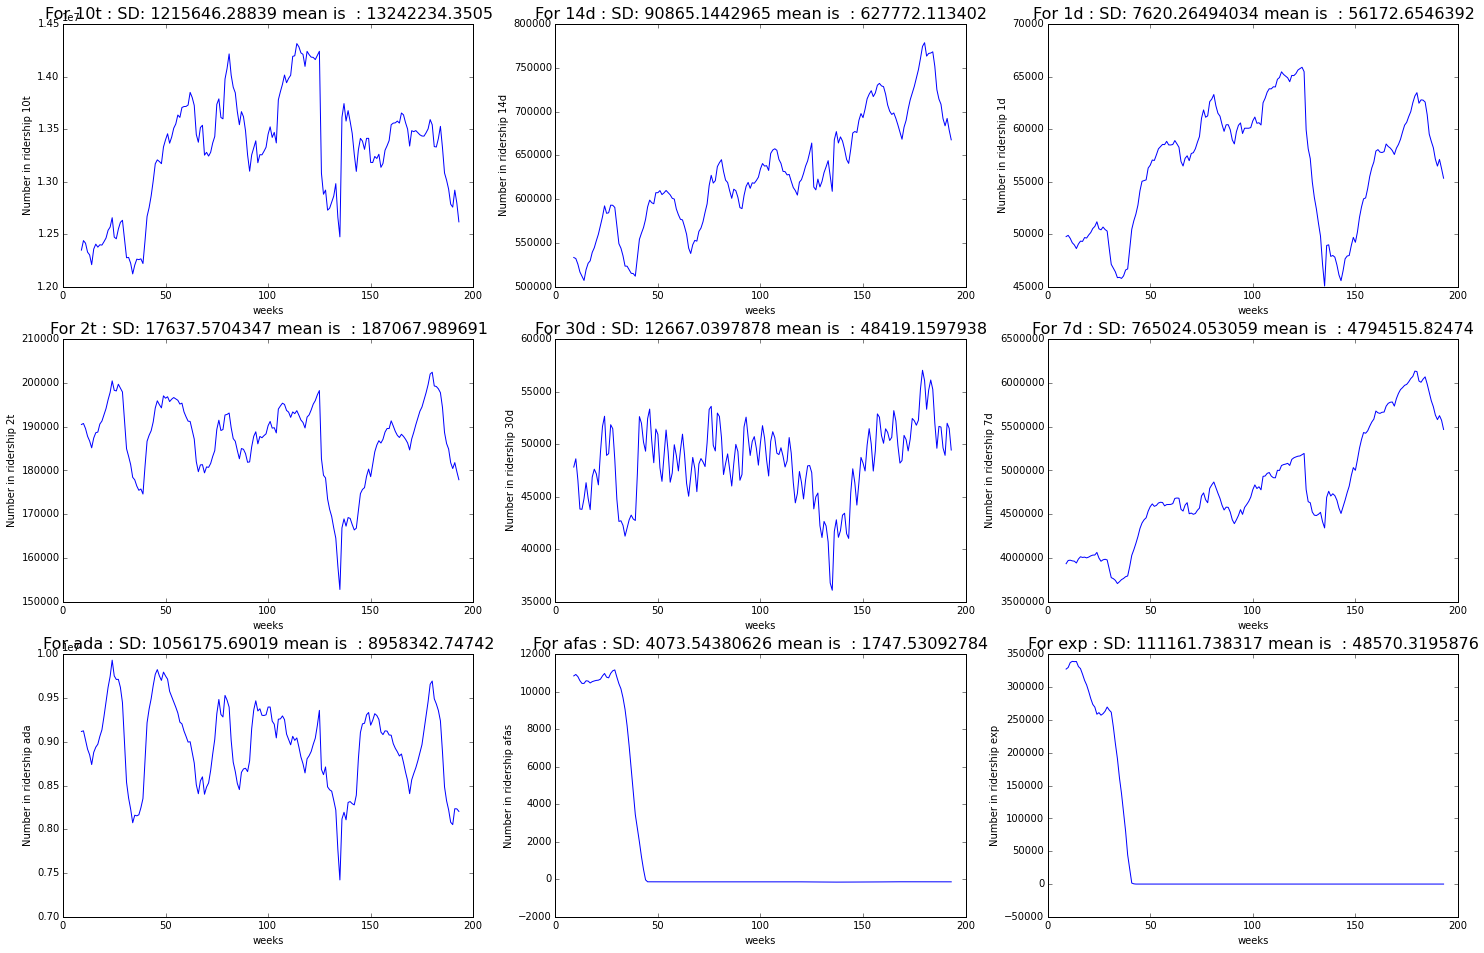

In [74]:
fig = pl.figure(figsize=(25,16))

axId = 331
for ri in range(0,9):
    ax = fig.add_subplot(axId)
    ax.plot(pd.rolling_mean(mta_ride1[ridetype[ri]], window =10))
    ax.set_title('For %s : SD: %s mean is  : %s' % 
                                         (ridetype[ri], 
                                          mta_ride1[ridetype[ri]].std(),
                                          mta_ride1[ridetype[ri]].mean())
                 , fontsize=16)
    plt.xlabel('weeks',fontsize=10)
    plt.ylabel('Number in ridership %s'% ridetype[ri])
    axId+=1   

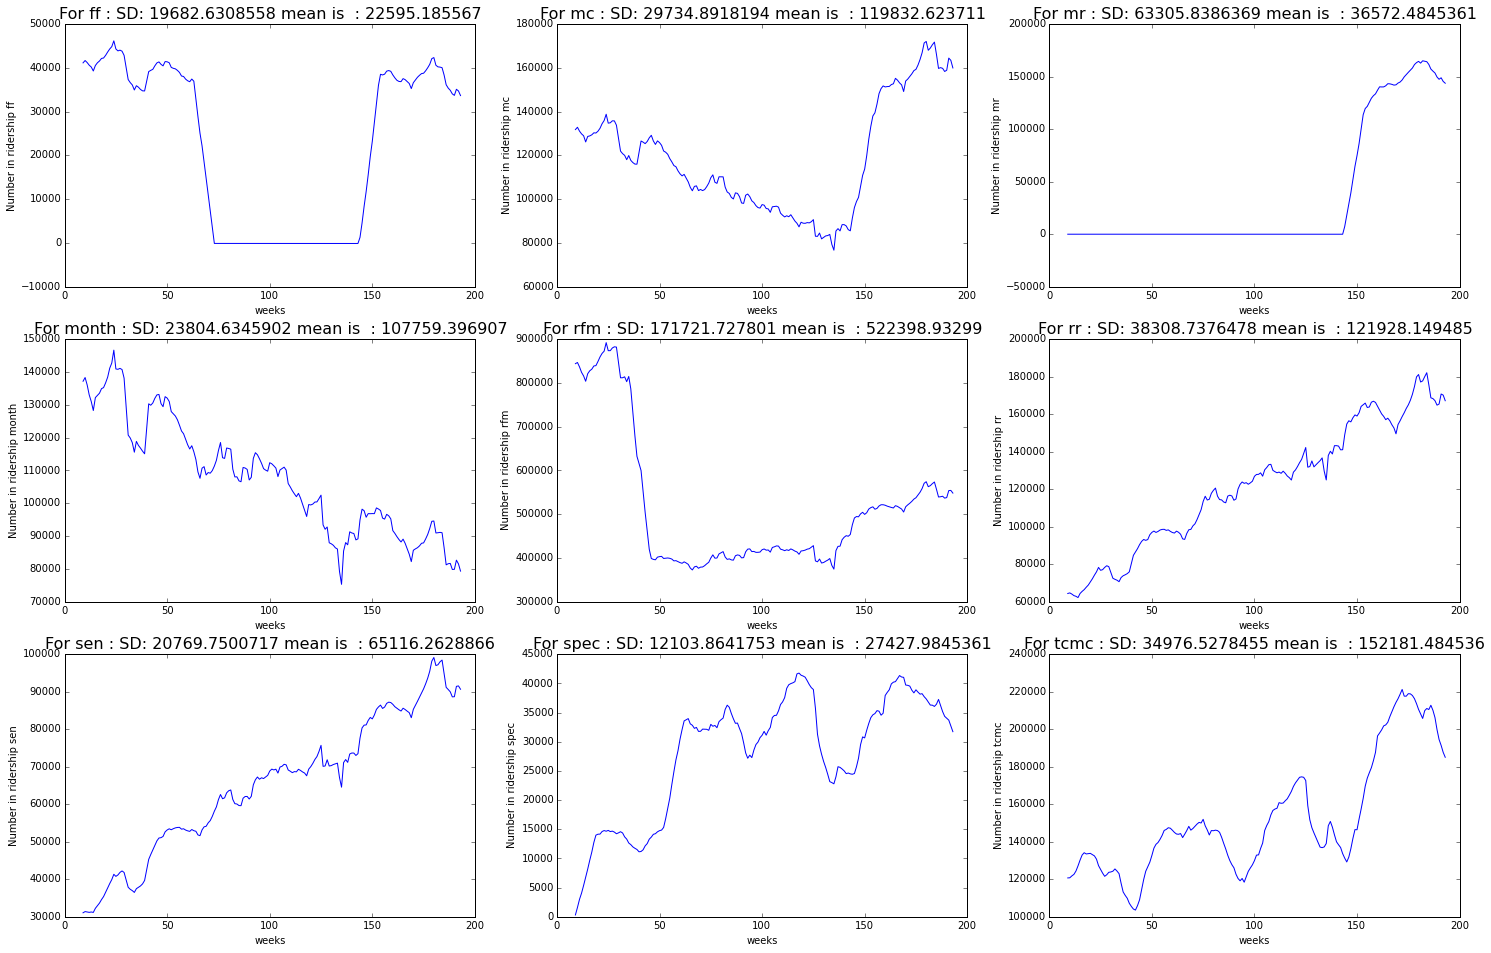

In [19]:
fig = pl.figure(figsize=(25,16))

axId = 331
for ri in range(10,19):
    ax = fig.add_subplot(axId)
    ax.plot(pd.rolling_mean(mta_ride1[ridetype[ri]], window =10))
    ax.set_title('For %s : SD: %s mean is  : %s' % 
                                         (ridetype[ri], 
                                          mta_ride1[ridetype[ri]].std(),
                                          mta_ride1[ridetype[ri]].mean())
                 , fontsize=16)
    plt.xlabel('weeks')
    plt.ylabel('Number in ridership %s'% ridetype[ri])
    axId+=1  

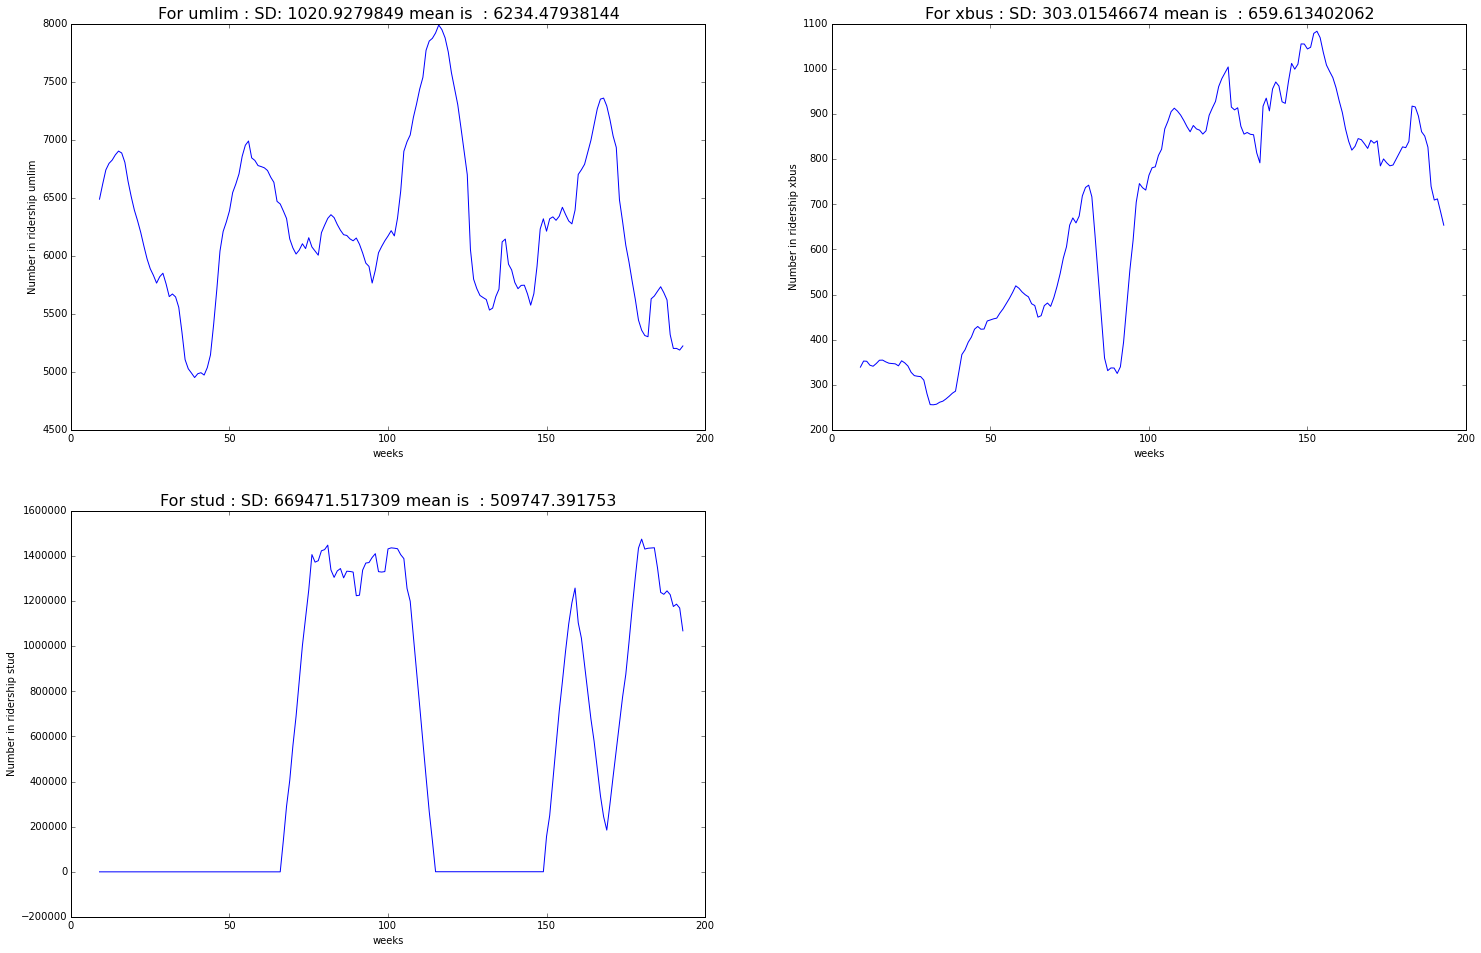

In [20]:
fig = pl.figure(figsize=(25,16))

axId = 221
for ri in range(20,23):
    ax = fig.add_subplot(axId)
    ax.plot(pd.rolling_mean(mta_ride1[ridetype[ri]], window =10))
    ax.set_title('For %s : SD: %s mean is  : %s' % 
                                         (ridetype[ri], 
                                          mta_ride1[ridetype[ri]].std(),
                                          mta_ride1[ridetype[ri]].mean())
                 , fontsize=16)
    plt.xlabel('weeks')
    plt.ylabel('Number in ridership %s'% ridetype[ri])
    axId+=1  

## observation : 

### Have conducted AD fuller test to show the stationarity of different ridertype.

##to determine if there is a trend or strucutre you can inspect the time series visually, since there are only 23!
##an alternative, algorithmic way to do it, is to fit a line to the (smoothed) time series  and look at the residuals.

## Task 3

In [22]:
mta_station_sum

array([[126877, 149476, 152382, ...,  78901,  74591,  76833],
       [ 37305,  46463,  49358, ...,    -23,    -23,    -23],
       [  6605,   6880,   7228, ...,   8171,   7907,   6790],
       ..., 
       [   -23,    -23,    -23, ...,    -23,    -23,    -23],
       [   -23,    -23,    -23, ...,    -23,    -23,    -23],
       [   -23,    -23,    -23, ...,    -23,    -23,    -23]])

In [23]:
mta_stat = pd.DataFrame(mta_station_sum)

In [24]:
mta_stat.head()

,0,1,2,3,4,5,6,7,8,9,...,184,185,186,187,188,189,190,191,192,193
0,126877,149476,152382,160174,162640,156413,159155,159373,163284,159251,...,87973,83825,91001,80908,79891,69881,79550,78901,74591,76833
1,37305,46463,49358,44848,41508,35653,41988,41908,41213,41141,...,-23,-23,-23,-23,-23,-23,-23,-23,-23,-23
2,6605,6880,7228,5730,7031,5106,5496,5667,5554,6941,...,8268,5928,5656,7665,8377,7343,7743,8171,7907,6790
3,16377,17407,17594,14241,17588,13167,14509,14387,14220,17179,...,23450,16228,15586,21806,23534,20604,21370,22459,22773,19033
4,18563,19902,19947,16075,20282,14600,16150,16065,16204,19618,...,23025,18253,17293,21484,22516,20560,21942,23283,22987,21562


In [25]:
mydata2=np.fft.rfftfreq(194, 1)   ##this is to calculate the frequency

In [26]:
mydata=np.array(mta_stat.loc[2])
mydata1 = np.abs(np.fft.rfft(mydata))

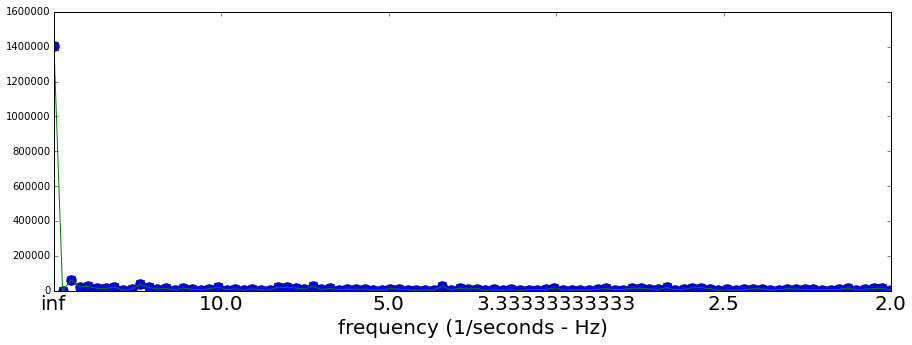

In [27]:
f = mydata1   ### passing the abs value of fft
N = len(mydata)  # passing length of data
fig=pl.figure(figsize=(15,5))
ax=fig.add_subplot(111)
ax.plot(np.fft.rfftfreq(N, 1.0), (f), 'o', ms=10)
ax.plot(np.fft.rfftfreq(N, 1.0), (f), '-')
#ax.set_xlim(0,1.0/10)
ax.set_xticklabels([ "%s"%(1/f) for f in ax.get_xticks()], fontsize=20)
pl.xlabel("frequency (1/seconds - Hz)", fontsize=20)

[  1166.85204053  62433.25550095  22982.7815257   24766.58880568
  14509.07963478  13363.67728723  21514.21863045   3604.24480535
   8872.99541288  36859.14731591  19606.30164078   9671.72055579
  13464.28581752   5051.42640521  15950.74954359   8748.90072232
   5862.69460597  12160.0918662   20468.27005435   6314.29999311
  11426.0545724    2752.32537402  11821.15690541   5822.2017511
   5610.11826701  20797.38087689  19839.24883725  16138.30816507
   9421.15540427  25608.52588011   7663.19978307  13834.1775461
   5826.90139168   9051.76211782   9021.12734284   9988.09779408
   4401.66193788   6470.42624967  12753.38715987   8753.28142601
   6707.75994637   2716.54338109   5968.61310359   2638.56580058
  26537.82194512   5694.36438402  15585.38810881   9571.77456098
  13175.87694676   1835.82841725   8891.97125168]


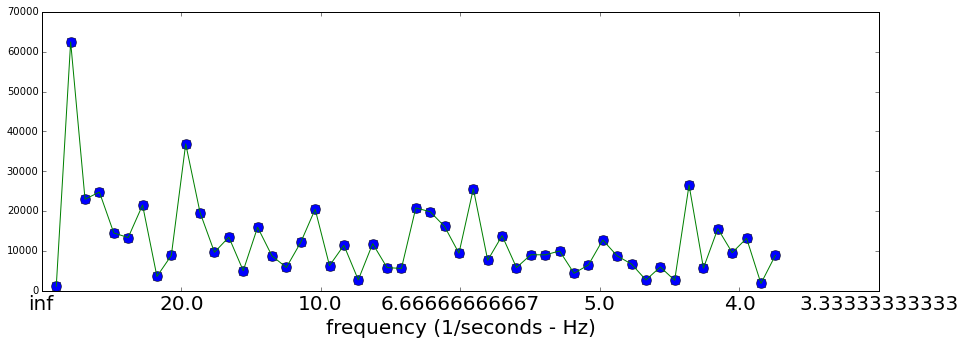

In [28]:
f = mydata1   ### passing the abs value of fft
print f[1:52]
N = len(mydata)  # passing length of data
fig=pl.figure(figsize=(15,5))
ax=fig.add_subplot(111)
ax.plot(np.fft.rfftfreq(N, 1.0)[1:52], (f[1:52]), 'o', ms=10)  ##searching for first 52 weeks
ax.plot(np.fft.rfftfreq(N, 1.0)[1:52], (f[1:52]), '-')
#ax.set_xlim(0,1.0/10)
ax.set_xticklabels([ "%s"%(1/f) for f in ax.get_xticks()], fontsize=20)
pl.xlabel("frequency (1/seconds - Hz)", fontsize=20)

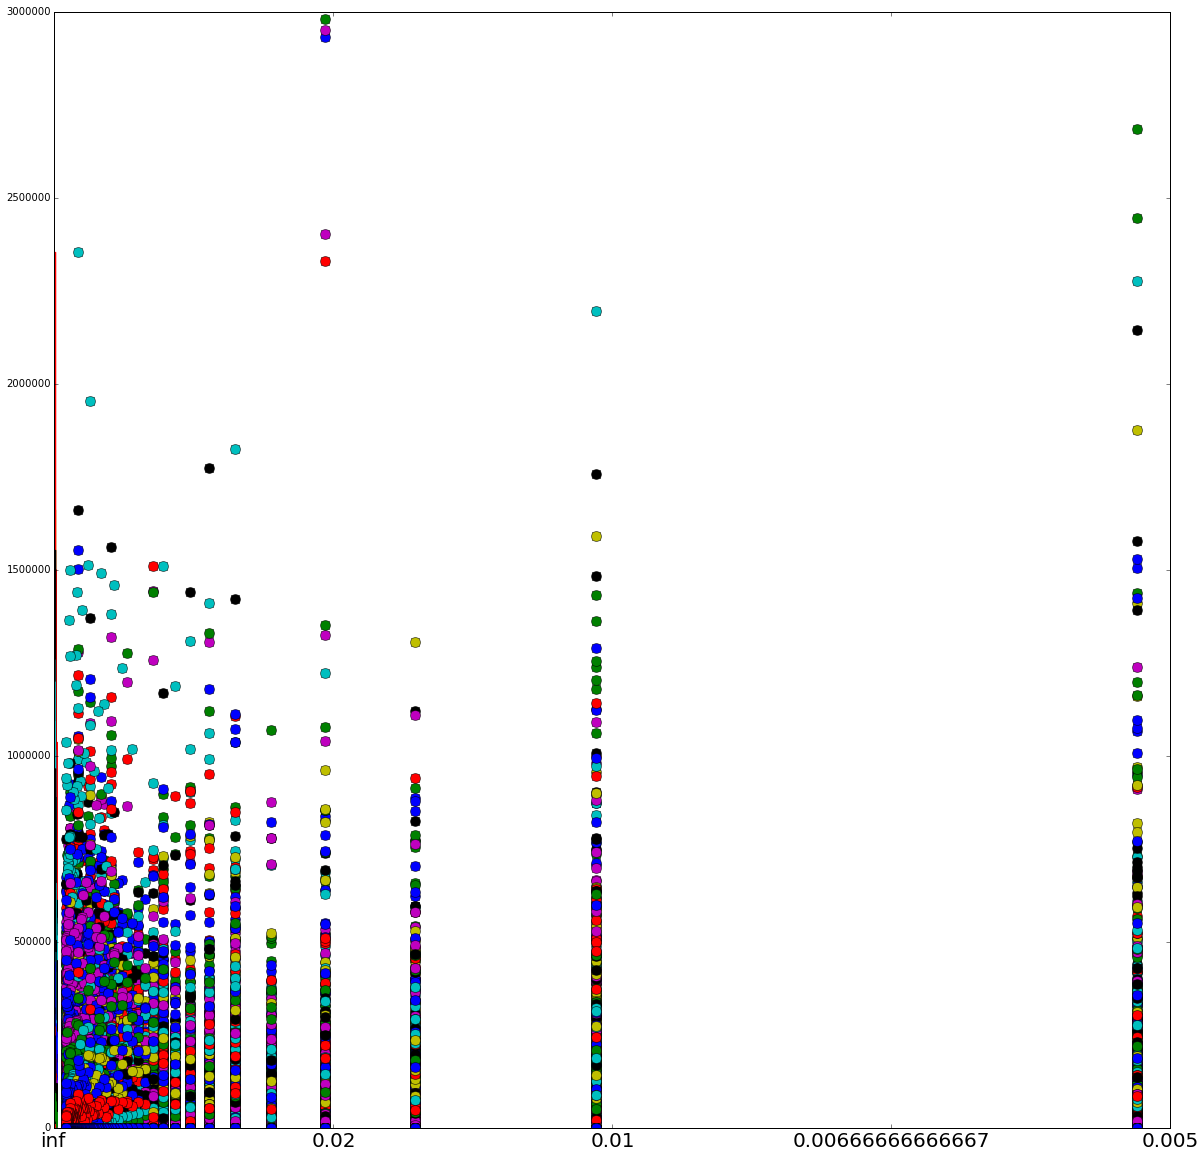

In [89]:
#mydata1=[]
fig=pl.figure(figsize=(20,20))
ax=fig.add_subplot(111)
for i in range(0,599):    ### plotting for all the 600 stations
    mydata=np.array(mta_stat.loc[i])
    f = np.abs(np.fft.rfft(mydata))
    #ax.plot(np.fft.rfftfreq(N, 1.0)[1:], (f[1:]), 'o', ms=10)  ##searching for first 52 weeks
    ax.plot(np.fft.rfftfreq(N, 1.0)[1:], (f[1:]), '-')
    ax.plot(1.0/np.fft.rfftfreq(N, 1.0)[1:N/2], abs(f[1:N/2]), 'o', ms=10)
#ax.set_xlim(0,1.0/10)
    ax.set_xticklabels([ "%s"%(1/f) for f in ax.get_xticks()], fontsize=20)
    #pl.xlabel("frequency (1/seconds - Hz)", fontsize=20)

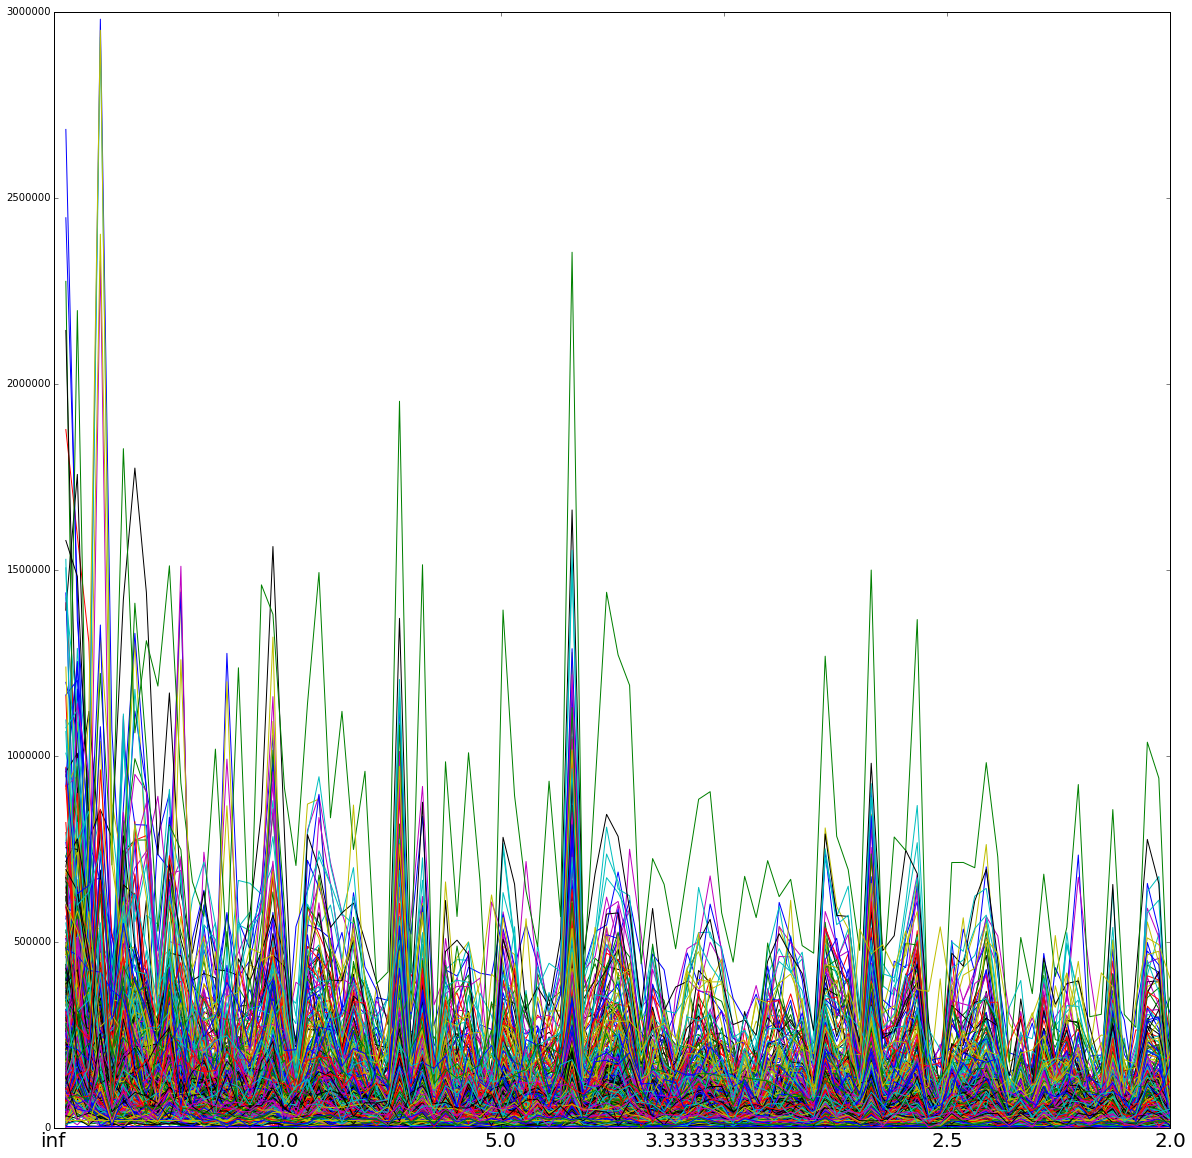

In [91]:
#mydata1=[]
fig=pl.figure(figsize=(20,20))
ax=fig.add_subplot(111)
for i in range(0,599):    ### plotting for all the 600 stations
    mydata=np.array(mta_stat.loc[i])
    f = np.abs(np.fft.rfft(mydata))
    #ax.plot(np.fft.rfftfreq(N, 1.0)[1:], (f[1:]), 'o', ms=10)  ##searching for first 52 weeks
    ax.plot(np.fft.rfftfreq(N, 1.0)[1:], (f[1:]), '-')
    #ax.plot(1.0/np.fft.rfftfreq(N, 1.0)[1:N/2], abs(f[1:N/2]), 'o', ms=10)
#ax.set_xlim(0,1.0/10)
    ax.set_xticklabels([ "%s"%(1/f) for f in ax.get_xticks()], fontsize=20)
    #pl.xlabel("frequency (1/seconds - Hz)", fontsize=20)

#observation  : above is the graph for all the 600 station , the perodicity can be seen in the graph with y values . high power. couldn't specify which station in particular .